In [237]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [238]:
df = pd.read_csv(r'/Users/SaiKumar/codeasylum/comp1/Downloads/MachineLearning/data.csv', encoding='unicode_escape')

## EDA

In [239]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/10 8:26,3.39,17850.0,United Kingdom


In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [241]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [242]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [243]:
df = df.dropna()

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      406829 non-null object
StockCode      406829 non-null object
Description    406829 non-null object
Quantity       406829 non-null int64
InvoiceDate    406829 non-null datetime64[ns]
UnitPrice      406829 non-null float64
CustomerID     406829 non-null float64
Country        406829 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [245]:
df.loc[:,'CustomerID'] = df['CustomerID'].astype('category')

In [246]:
for i in df.select_dtypes(include=['object', 'category']).columns:
    print((df[i].value_counts()/len(df))*100)

576339     0.133226
579196     0.131013
580727     0.130030
578270     0.108645
573576     0.106925
             ...   
C568388    0.000246
C541261    0.000246
C557655    0.000246
C570207    0.000246
C577345    0.000246
Name: InvoiceNo, Length: 22190, dtype: float64
85123A    0.510534
22423     0.468256
85099B    0.408525
84879     0.348549
47566     0.348058
            ...   
90074     0.000246
90190A    0.000246
84802A    0.000246
85170A    0.000246
84551     0.000246
Name: StockCode, Length: 3684, dtype: float64
WHITE HANGING HEART T-LIGHT HOLDER     0.508813
REGENCY CAKESTAND 3 TIER               0.468256
JUMBO BAG RED RETROSPOT                0.408525
ASSORTED COLOUR BIRD ORNAMENT          0.348549
PARTY BUNTING                          0.348058
                                         ...   
GREEN DROP EARRINGS W BEAD CLUSTER     0.000246
RUBY GLASS CLUSTER NECKLACE            0.000246
FUNKY MONKEY MUG                       0.000246
BLACK FINE BEAD NECKLACE W TASSEL      0.00024

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      406829 non-null object
StockCode      406829 non-null object
Description    406829 non-null object
Quantity       406829 non-null int64
InvoiceDate    406829 non-null datetime64[ns]
UnitPrice      406829 non-null float64
CustomerID     406829 non-null category
Country        406829 non-null object
dtypes: category(1), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 25.8+ MB


In [248]:
df.nunique()

InvoiceNo      22190
StockCode       3684
Description     3896
Quantity         436
InvoiceDate    20460
UnitPrice        620
CustomerID      4372
Country           37
dtype: int64

In [249]:
df.describe()

,Quantity,UnitPrice
count,406829.000000,406829.000000
mean,12.061303,3.460471
std,248.693370,69.315162
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


In [251]:
#df['StockCode'].map(lambda x: re.findall('^[^0-9]+',x))

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      406829 non-null object
StockCode      406829 non-null object
Description    406829 non-null object
Quantity       406829 non-null int64
InvoiceDate    406829 non-null datetime64[ns]
UnitPrice      406829 non-null float64
CustomerID     406829 non-null category
Country        406829 non-null object
dtypes: category(1), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 25.8+ MB


## Feature Engineering

In [301]:
freq = df['InvoiceNo'].groupby(df['CustomerID']).nunique().to_frame()

In [302]:
Total_Value = df['UnitPrice'].groupby(df['CustomerID']).sum().to_frame()

In [303]:
freq

,InvoiceNo
CustomerID,
12346.0,2
12347.0,7
12348.0,4
12349.0,1
12350.0,1
...,...
18280.0,1
18281.0,1
18282.0,3


In [304]:
freq.rename({'InvoiceNo':"Freq"},axis='columns', inplace=True)

In [305]:
cust = pd.concat([freq, Total_Value], axis=1)

In [306]:
cust

,Freq,UnitPrice
CustomerID,,
12346.0,2,2.08
12347.0,7,481.21
12348.0,4,178.71
12349.0,1,605.10
12350.0,1,65.30
...,...,...
18280.0,1,47.65
18281.0,1,39.36
18282.0,3,62.68


In [316]:
df['CustomerID'].groupby(df['InvoiceDate']).value_counts()

InvoiceDate          CustomerID
2010-12-01 08:26:00  17850.0        7
2010-12-01 08:28:00  17850.0        2
2010-12-01 08:34:00  13047.0       16
2010-12-01 08:35:00  13047.0        1
2010-12-01 08:45:00  12583.0       20
                                   ..
2011-12-09 12:23:00  13777.0        2
2011-12-09 12:25:00  13777.0        2
2011-12-09 12:31:00  15804.0       21
2011-12-09 12:49:00  13113.0        4
2011-12-09 12:50:00  12680.0       15
Name: CustomerID, Length: 22034, dtype: int64

In [500]:
cust.drop(cust[cust['Freq'] > 100].index, inplace = True)

In [501]:
cust.drop(cust[cust['UnitPrice'] > 1000].index, inplace = True)

In [502]:
X = cust[['Freq', 'UnitPrice']]

In [503]:
y = pd.DataFrame(cust.index)

## Customer Segmentation

In [504]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [505]:
km = KMeans(n_clusters=3)

In [506]:
km.fit(X,y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [507]:
silhouette_score(X,km.labels_)

0.6377724541574902

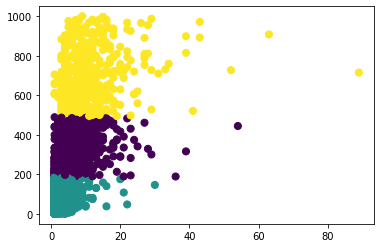

In [508]:
plt.scatter(X.iloc[:,0],X.iloc[:,1], c=km.labels_, s=50)

## Churn Prediction

In [509]:
cust

,Freq,UnitPrice,days
CustomerID,,,
12346.0,2,2.08,06
12347.0,7,481.21,06
12348.0,4,178.71,06
12349.0,1,605.10,06
12350.0,1,65.30,06
...,...,...,...
18278.0,1,29.55,08
18280.0,1,47.65,08
18281.0,1,39.36,08


In [510]:
temp = df[['CustomerID', 'InvoiceDate']]

In [511]:
temp

,CustomerID,InvoiceDate
0,17850.0,2010-12-01 08:26:00
1,17850.0,2010-12-01 08:26:00
2,17850.0,2010-12-01 08:26:00
3,17850.0,2010-12-01 08:26:00
4,17850.0,2010-12-01 08:26:00
...,...,...
541904,12680.0,2011-12-09 12:50:00
541905,12680.0,2011-12-09 12:50:00
541906,12680.0,2011-12-09 12:50:00
541907,12680.0,2011-12-09 12:50:00


In [517]:
temp['month'] = temp.loc[:,'InvoiceDate'].apply(lambda x: x.strftime('%m'))

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [520]:
temp['year'] = temp.loc[:,'InvoiceDate'].apply(lambda x: x.strftime('%Y'))

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [521]:
temp

,CustomerID,InvoiceDate,month,year
0,17850.0,2010-12-01 08:26:00,12,2010
1,17850.0,2010-12-01 08:26:00,12,2010
2,17850.0,2010-12-01 08:26:00,12,2010
3,17850.0,2010-12-01 08:26:00,12,2010
4,17850.0,2010-12-01 08:26:00,12,2010
...,...,...,...,...
541904,12680.0,2011-12-09 12:50:00,12,2011
541905,12680.0,2011-12-09 12:50:00,12,2011
541906,12680.0,2011-12-09 12:50:00,12,2011
541907,12680.0,2011-12-09 12:50:00,12,2011


In [532]:
for i in temp['CustomerID'].groupby(temp['month'].value_counts()):
    print(i)